Попытки доказать Colab, что я не трачу бездарно его ресурсы (автоклик)

In [ ]:
from IPython.display import Javascript
Javascript('''
function KeepAlive() {
  console.log("Поддержание активности Colab");
  document.querySelector("colab-toolbar-button").click();
  setTimeout(KeepAlive, 15*60*1000);  // Клик каждые 15 минут
}
KeepAlive();
''')

<IPython.core.display.Javascript object>

## **Что изменилось?**
Поменяла соотношение между val_ratio/test_ratio, потому что датасет очень маленький. Смягчила предобработку, добавила blur в трансформации. Добавила dropout

torchmetrics нужно устанавливать

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

## **Клонирование репозитория или подтягивание обновлений**

In [3]:
# Клонирование репозитория
import os
if not os.path.exists('skin_lesion_segmentation'):
    !git clone https://github.com/Marianicko/skin_lesion_segmentation.git
else:
    %cd skin_lesion_segmentation
    !git pull
    %cd ..



Cloning into 'skin_lesion_segmentation'...
remote: Enumerating objects: 753, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 753 (delta 0), reused 2 (delta 0), pack-reused 748 (from 1)
Receiving objects: 100% (753/753), 281.79 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (405/405), done.
Updating files: 100% (488/488), done.


Можно посмотреть последние коммиты:

In [4]:
# Проверка последних коммитов (опционально)
from git import Repo
repo = Repo('skin_lesion_segmentation')
print("Последние коммиты:")
for commit in list(repo.iter_commits('master', max_count=3)):
    print(f"{commit.hexsha[:7]} - {commit.message}")

Последние коммиты:
f40f70f - вернула старую модель в импорте model

5bbdd57 - Убрала косяк с подсчётом train_iou

3c7b47e - final changes



Пути до src и корня будем использовать ниже, добавим их в PATH

In [4]:
import sys
import os
# Правильное добавление пути к модулям
repo_path = '/content/skin_lesion_segmentation'
src_path = os.path.join(repo_path, 'src')
sys.path.insert(0, repo_path)  # Добавляем корень репозитория
sys.path.insert(0, src_path)  # Добавляем папку src

# Проверка содержимого папки src (для отладки)
print("Содержимое папки src:")
print(os.listdir(src_path))

# Проверка путей (для отладки)
print("\nПути поиска модулей:")
for path in sys.path:
    print(path)

Содержимое папки src:
['dd.py', 'preprocess.py', 'metric.py', 'unet_2405.py', 'dataset_upd_2205.py', 'train.py', 'train_2405.py', 'config.py', 'unet.py', 'dataset_upd_1505.py', 'train_2305.py', 'checkpointer_2205.py', 'model.py', 'train_new_2005.py', 'test_preprocessing.py', 'preprocess_hb.py', 'visualizations', 'dataset_upd_2405.py', 'preprocess_spec_2005.py', 'train_2205.py', 'train_2005.py', '__pycache__', 'utils.py', 'dataset_upd_2305.py', 'checkpoints', 'preprocess_spec_2305.py', 'logs', 'dataset_cur.py', 'checkpointer.py', 'preprocess_spec.py', '.ipynb_checkpoints', 'visualize.ipynb', 'loss.py', 'dataset_upd_2005.py', 'text', 'dataset_upd.py', 'train_old.py']

Пути поиска модулей:
/content/skin_lesion_segmentation/src
/content/skin_lesion_segmentation
/content
/env/python
/usr/lib/python311.zip
/usr/lib/python3.11
/usr/lib/python3.11/lib-dynload

/usr/local/lib/python3.11/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.11/dist-packages/IPython/extensions
/usr/

## Импорты модулей с GitHub

In [5]:
from dataset_upd_2405 import get_datasets
from model import SegmentationModel
from config import Config
from train_2405 import train, evaluate
from preprocess_spec_2305 import DermatologyPreprocessor

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.6'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Проверяем доступность GPU:

In [6]:
import torch
print("Доступен GPU:", torch.cuda.is_available())
Config.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Устройство для обучения:", Config.DEVICE)

Доступен GPU: True
Устройство для обучения: cuda


# Внимание!
Нужно будет поменять настройки конфигурационного файла (там директории указаны таким образом, чтобы в PyCharm запускать)

In [7]:
Config.IMAGES_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainx"
Config.MASKS_DIR = "/content/skin_lesion_segmentation/PH2_Dataset/trainy"

Проверили, что папки есть и они непусты

In [8]:
from pathlib import Path

# Укажите правильные пути (пример для Colab)
print(Config.BATCH_SIZE)

# Создаём папки, если их нет
Path(Config.IMAGES_DIR).mkdir(parents=True, exist_ok=True)
Path(Config.MASKS_DIR).mkdir(parents=True, exist_ok=True)

# Проверка данных
assert len(os.listdir(Config.IMAGES_DIR)) > 0, "Нет изображений!"
assert len(os.listdir(Config.MASKS_DIR)) > 0, "Нет масок!"
print(f"Найдено {len(os.listdir(Config.IMAGES_DIR))} изображений и {len(os.listdir(Config.MASKS_DIR))} масок")

4
Найдено 200 изображений и 200 масок


(Тут была диагностика, вставь при необходимости)

In [9]:
Config.LOGS_DIR = "/content/skin_lesion_segmentation/logs"
Config.CHECKPOINTS_DIR = "/content/skin_lesion_segmentation/checkpoints"

## **Функция для визуализации результатов:**

Прошлый вариант plot_training_curves сталкивался с ошибкой - несоответствие размеров массивов. Исправляем:

In [10]:
import matplotlib.pyplot as plt

In [11]:
def plot_training_curves(log_dir=Config.LOGS_DIR):
    import pandas as pd
    from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

    # Загружаем данные из TensorBoard
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()

    # Собираем метрики с проверкой наличия
    metrics = {}
    for tag in ['Loss_train', 'Loss_val', 'IoU/val', 'IoU/train', 'Best_IoU', 'Best_Loss']:
        if tag in event_acc.Tags()['scalars']:
            metrics[tag] = [e.value for e in event_acc.Scalars(tag)]
        else:
            print(f"Предупреждение: метрика {tag} не найдена в логах")
            metrics[tag] = []

    # Определяем общее количество эпох
    max_length = max(len(metrics[tag]) for tag in metrics) if metrics else 0
    if max_length == 0:
        print("Нет данных для визуализации")
        return

    # Выравниваем массивы по длине
    aligned_metrics = {}
    for tag in metrics:
        if len(metrics[tag]) < max_length:
            aligned_metrics[tag] = metrics[tag] + [None] * (max_length - len(metrics[tag]))
        else:
            aligned_metrics[tag] = metrics[tag][:max_length]

    # Создаем DataFrame
    df = pd.DataFrame({
        'epoch': range(max_length),
        'train_loss': aligned_metrics.get('Loss_train', [None]*max_length),
        'val_loss': aligned_metrics.get('Loss_val', [None]*max_length),
        'val_iou': aligned_metrics.get('IoU/val', [None]*max_length),
        'train_iou': aligned_metrics.get('IoU/train', [None]*max_length),
        'best_iou': aligned_metrics.get('Best_IoU', [None]*max_length),
        'best_loss': aligned_metrics.get('Best_Loss', [None]*max_length)
    }).dropna(how='all', subset=['train_loss', 'val_loss'])  # Удаляем пустые строки

    if df.empty:
        print("Нет данных для построения графиков")
        return

    # Рисуем графики
    plt.figure(figsize=(15, 5))

    # График Loss
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['train_loss'], label='Train Loss')
    plt.plot(df['epoch'], df['val_loss'], label='Val Loss')
    if not df['best_loss'].isnull().all():
        plt.plot(df['epoch'], df['best_loss'], '--', label='Best Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # График IoU
    plt.subplot(1, 2, 2)
    if not df['val_iou'].isnull().all():
        plt.plot(df['epoch'], df['val_iou'], label='Val IoU')
    plt.plot(df['epoch'], df['train_iou'], label='Train IoU')
    if not df['best_iou'].isnull().all():
        plt.plot(df['epoch'], df['best_iou'], '--', label='Best IoU')
    plt.xlabel('Epoch')
    plt.ylabel('IoU')
    plt.legend()

    plt.tight_layout()
    plt.show()

## **Настройка весов модели**
Рассказать про подбор

In [37]:
Config.CLASS_WEIGHTS = [0.7, 0.3]

##**Настройки обучения**
Можно выбрать - включать предобработку или нет (по умолчанию предобработка включена, эпох 50, но это было убийственно для предобработанных изображений, поэтому 25)

In [46]:
Config.EPOCHS = 25
Config.PREPROCESS_FLAG = True

In [47]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR, Config.CLASS_WEIGHTS)

25 True /content/skin_lesion_segmentation/logs [0.7, 0.3]


Тренировка + валидация:

It's okay
It's okay
It's okay
It's okay


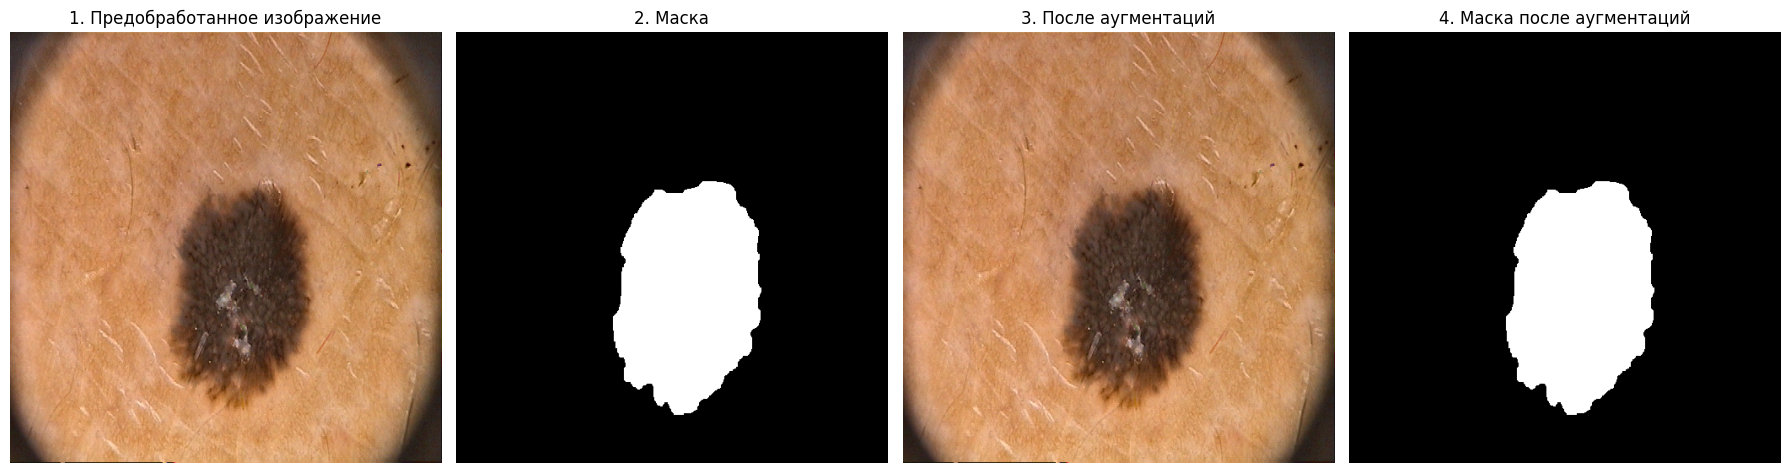

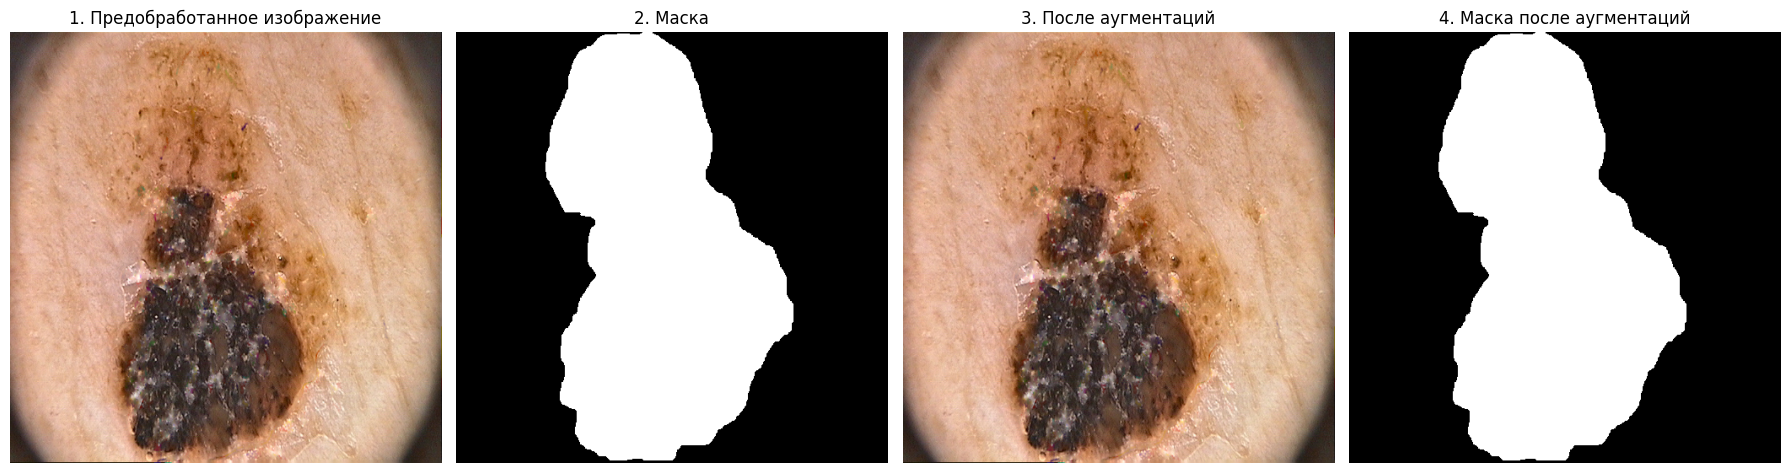

Epoch 1:   2%|▎         | 1/40 [00:05<03:51,  5.93s/it]

Доступные метрики в логах: []


KeyboardInterrupt: 

In [87]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

try:
  model = train()
finally:
  # Проверка содержимого логов
  event_acc = EventAccumulator(Config.LOGS_DIR)
  event_acc.Reload()
  print("Доступные метрики в логах:", event_acc.Tags()['scalars'])


## **Изменение логирования**


In [54]:
import os

import cv2
import torch
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from dataset_upd_2405 import get_datasets
from model import SegmentationModel
from config import Config
from tqdm import tqdm
from checkpointer_2205 import CheckpointSaver
from metric import MeanIoU
from loss import CrossEntropyDiceLoss
from accelerate import Accelerator
from utils import seed_everything
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def train():
    seed_everything(42)
    accelerator = Accelerator(
        cpu=False,
        mixed_precision="fp16" if Config.DEVICE == "cuda" else "no"
    )
    writer = SummaryWriter(Config.LOGS_DIR)

    # Модель и оптимизатор
    model = SegmentationModel()
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=Config.LR,
        weight_decay=Config.WEIGHT_DECAY
    )

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='max',  # Следим за ростом IoU
        factor=0.5,  # Уменьшаем LR в 2 раза
        patience=5,  # Количество эпох без улучшений
        min_lr=1e-5  # Минимальный LR
    )

    # Данные
    train_dataset, val_dataset, test_dataset = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        preprocess=Config.PREPROCESS_FLAG,
        crop_borders=True
    )

    train_loader = DataLoader(
        train_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=True,
        num_workers=Config.NUM_WORKERS,
        pin_memory=True,
        drop_last=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=Config.BATCH_SIZE,
        num_workers=Config.NUM_WORKERS,
        pin_memory=True
    )

    # Loss и метрики
    device = accelerator.device
    class_weights = torch.tensor(Config.CLASS_WEIGHTS, device=device)
    loss_fn = CrossEntropyDiceLoss(weight=class_weights, ignore_index=-1).to(device)
    metric_fn = MeanIoU(classes_num=Config.NUM_CLASSES, ignore_index=-1).to(device)
    train_metric_fn = MeanIoU(classes_num=Config.NUM_CLASSES, ignore_index=-1).to(device)  # Для train IoU

    # Подготовка для Accelerator
    model, optimizer, train_loader, val_loader, scheduler = accelerator.prepare(
        model, optimizer, train_loader, val_loader, scheduler
    )

    # Чекпоинтер
    checkpointer = CheckpointSaver(
        accelerator=accelerator,
        model=model,
        metric_name="MeanIoU",
        save_dir=Config.CHECKPOINTS_DIR,
        should_minimize=False
    )

    # Визуализация до обучения
    visualize_sample(train_dataset, "Train Sample", preprocess_flag=Config.PREPROCESS_FLAG, save_to_disk=True)
    visualize_sample(val_dataset, "Val Sample", preprocess_flag=Config.PREPROCESS_FLAG)

    # Цикл обучения
    best_iou = 0.0
    best_loss = float('inf')

    for epoch in range(Config.EPOCHS):
        model.train()
        epoch_train_loss = 0.0
        train_metric_fn.reset()  # Сбрасываем метрику перед каждой эпохой

        # Train phase
        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch + 1}"):
            try:
                optimizer.zero_grad()
                outputs = model(images)
                loss = loss_fn(outputs, masks.long())
                accelerator.backward(loss)
                optimizer.step()

                # Обновляем метрики
                epoch_train_loss += loss.item()
                train_metric_fn.update(outputs.detach(), masks.long())  # Вычисляем train IoU

            except Exception as batch_error:
                print(f"\nBatch error: {batch_error}")
                continue

        # Вычисляем train IoU
        train_iou = train_metric_fn.compute().item()
        epoch_train_loss /= len(train_loader)

        # Val phase
        model.eval()
        val_loss = 0.0
        metric_fn.reset()
        with torch.no_grad():
            for images, masks in val_loader:
                outputs = model(images)
                val_loss += loss_fn(outputs, masks.long()).item()
                metric_fn.update(outputs, masks.long())

            val_iou = metric_fn.compute().item()
            val_loss /= len(val_loader)

            scheduler.step(val_iou)
            current_lr = optimizer.param_groups[0]['lr']

            # Обновляем лучшие метрики
            if val_iou > best_iou:
                best_iou = val_iou
            if val_loss < best_loss:
                best_loss = val_loss

            # Логирование в TensorBoard
            writer.add_scalars("Loss", {
                "train": epoch_train_loss,
                "val": val_loss
            }, epoch)

            writer.add_scalars("IoU", {
                "train": train_iou,
                "val": val_iou
            }, epoch)

            writer.add_scalar("Best_IoU", best_iou, epoch)
            writer.add_scalar("Best_Loss", best_loss, epoch)
            writer.add_scalar("LR", current_lr, epoch)
            writer.add_scalar("IoU/val", val_iou, epoch)
            writer.add_scalar("IoU/train", train_iou, epoch)
            writer.add_scalar("Loss_train", epoch_train_loss, epoch)
            writer.add_scalar("Loss_val", val_loss, epoch)

        # Сохранение чекпоинта
        checkpointer.save(metric_val=val_iou, loss_val=val_loss, epoch=epoch)

        # Вывод в консоль
        print(
            f"Epoch {epoch + 1}/{Config.EPOCHS} | "
            f"Train Loss: {epoch_train_loss:.4f} | "
            f"Train IoU: {train_iou:.4f} | "
            f"Val Loss: {val_loss:.4f} | "
            f"Val IoU: {val_iou:.4f} | "
            f"LR = {current_lr:.2e} | "
            f"Best IoU: {best_iou:.4f} | "
            f"Best Loss: {best_loss:.4f}"
        )

    writer.close()
    print("Training completed!")
    return accelerator.unwrap_model(model)

In [56]:
def visualize_sample(dataset, title="Sample", preprocess_flag=False, save_to_disk=False):
    original_dataset = dataset.dataset if hasattr(dataset, 'dataset') else dataset
    idx = dataset.indices[0] if hasattr(dataset, 'indices') else 0

    # Получаем сырые данные (без трансформаций)
    image, mask = original_dataset.__getitem__(idx, apply_transform=False)

    fig, axes = plt.subplots(1, 3 if not original_dataset.transform else 4, figsize=(18, 5))

    # 1. Исходное/предобработанное изображение
    axes[0].imshow(image)
    axes[0].set_title(f"1. {'Предобработанное' if preprocess_flag else 'Сырое'} изображение")

    # 2. Маска
    axes[1].imshow(mask.squeeze(), cmap='gray')
    axes[1].set_title("2. Маска")

    # 3. Если есть трансформы - аугментированное изображение
    if original_dataset.transform:
        augmented = original_dataset.transform(image=image, mask=mask)
        aug_img = augmented["image"].permute(1, 2, 0).numpy()
        axes[2].imshow(aug_img)
        axes[2].set_title("3. После аугментаций")

        # 4. Аугментированная маска
        axes[3].imshow(augmented["mask"].squeeze(), cmap='gray')
        axes[3].set_title("4. Маска после аугментаций")

    for ax in axes:
        ax.axis('off')

    if save_to_disk:
        os.makedirs("visualizations", exist_ok=True)
        fig.savefig(f"visualizations/{title.replace(' ', '_')}.png", bbox_inches='tight')

    plt.tight_layout()
    plt.show()
    return fig


## Новый тест

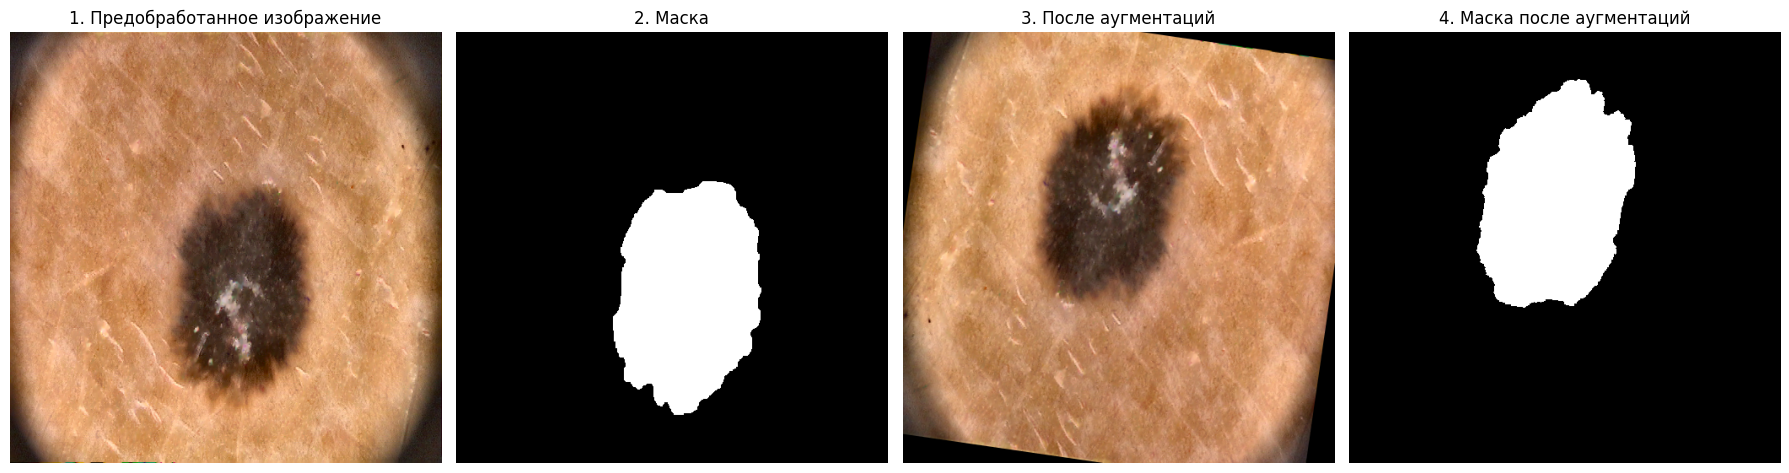

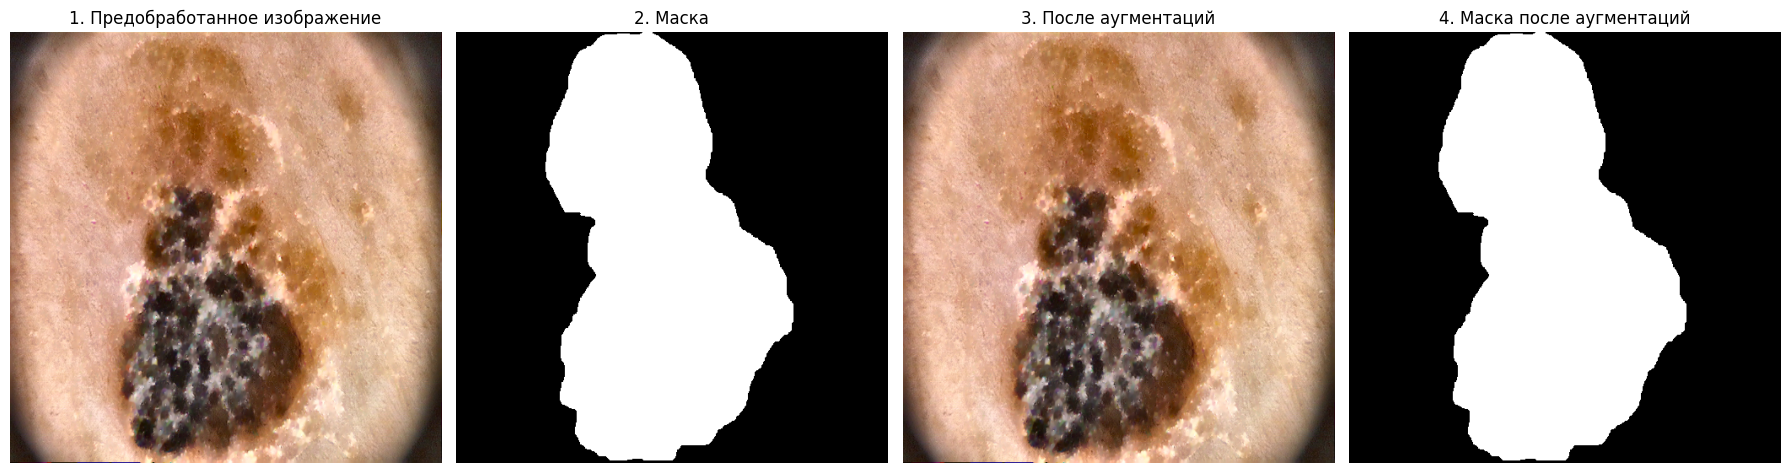

Epoch 1: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.7348, Loss=0.3343 (epoch 1)


Epoch 1/25 | Train Loss: 0.3876 | Train IoU: 0.6969 | Val Loss: 0.3343 | Val IoU: 0.7348 | LR = 1.00e-04 | Best IoU: 0.7348 | Best Loss: 0.3343


Epoch 2: 100%|██████████| 40/40 [02:16<00:00,  3.41s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8327, Loss=0.2592 (epoch 2)


Epoch 2/25 | Train Loss: 0.2751 | Train IoU: 0.7817 | Val Loss: 0.2592 | Val IoU: 0.8327 | LR = 1.00e-04 | Best IoU: 0.8327 | Best Loss: 0.2592


Epoch 3: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8327, Loss=0.2592 (epoch 2)


Epoch 3/25 | Train Loss: 0.2423 | Train IoU: 0.8093 | Val Loss: 0.2449 | Val IoU: 0.7930 | LR = 1.00e-04 | Best IoU: 0.8327 | Best Loss: 0.2449


Epoch 4: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8327, Loss=0.2592 (epoch 2)


Epoch 4/25 | Train Loss: 0.2239 | Train IoU: 0.8079 | Val Loss: 0.2501 | Val IoU: 0.7648 | LR = 1.00e-04 | Best IoU: 0.8327 | Best Loss: 0.2449


Epoch 5: 100%|██████████| 40/40 [02:19<00:00,  3.48s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8327, Loss=0.2592 (epoch 2)


Epoch 5/25 | Train Loss: 0.2308 | Train IoU: 0.7781 | Val Loss: 0.2094 | Val IoU: 0.8056 | LR = 1.00e-04 | Best IoU: 0.8327 | Best Loss: 0.2094


Epoch 6: 100%|██████████| 40/40 [02:15<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8464, Loss=0.2190 (epoch 6)


Epoch 6/25 | Train Loss: 0.2298 | Train IoU: 0.7813 | Val Loss: 0.2190 | Val IoU: 0.8464 | LR = 1.00e-04 | Best IoU: 0.8464 | Best Loss: 0.2094


Epoch 7: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8464, Loss=0.2190 (epoch 6)


Epoch 7/25 | Train Loss: 0.1790 | Train IoU: 0.8305 | Val Loss: 0.1768 | Val IoU: 0.8179 | LR = 1.00e-04 | Best IoU: 0.8464 | Best Loss: 0.1768


Epoch 8: 100%|██████████| 40/40 [02:16<00:00,  3.41s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8464, Loss=0.2190 (epoch 6)


Epoch 8/25 | Train Loss: 0.1802 | Train IoU: 0.8194 | Val Loss: 0.1602 | Val IoU: 0.8363 | LR = 1.00e-04 | Best IoU: 0.8464 | Best Loss: 0.1602


Epoch 9: 100%|██████████| 40/40 [02:16<00:00,  3.41s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 9/25 | Train Loss: 0.1812 | Train IoU: 0.8151 | Val Loss: 0.1581 | Val IoU: 0.8494 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1581


Epoch 10: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 10/25 | Train Loss: 0.2046 | Train IoU: 0.7953 | Val Loss: 0.1690 | Val IoU: 0.8460 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1581


Epoch 11: 100%|██████████| 40/40 [02:15<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 11/25 | Train Loss: 0.1690 | Train IoU: 0.8275 | Val Loss: 0.2104 | Val IoU: 0.7656 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1581


Epoch 12: 100%|██████████| 40/40 [02:15<00:00,  3.39s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 12/25 | Train Loss: 0.1817 | Train IoU: 0.8002 | Val Loss: 0.1553 | Val IoU: 0.8327 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1553


Epoch 13: 100%|██████████| 40/40 [02:14<00:00,  3.37s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 13/25 | Train Loss: 0.1730 | Train IoU: 0.8155 | Val Loss: 0.1537 | Val IoU: 0.8336 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1537


Epoch 14: 100%|██████████| 40/40 [02:14<00:00,  3.37s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 14/25 | Train Loss: 0.1730 | Train IoU: 0.8236 | Val Loss: 0.1748 | Val IoU: 0.8448 | LR = 1.00e-04 | Best IoU: 0.8494 | Best Loss: 0.1537


Epoch 15: 100%|██████████| 40/40 [02:15<00:00,  3.39s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 15/25 | Train Loss: 0.1750 | Train IoU: 0.8154 | Val Loss: 0.1446 | Val IoU: 0.8332 | LR = 5.00e-05 | Best IoU: 0.8494 | Best Loss: 0.1446


Epoch 16: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 16/25 | Train Loss: 0.1634 | Train IoU: 0.8155 | Val Loss: 0.1397 | Val IoU: 0.8490 | LR = 5.00e-05 | Best IoU: 0.8494 | Best Loss: 0.1397


Epoch 17: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8494, Loss=0.1581 (epoch 9)


Epoch 17/25 | Train Loss: 0.1473 | Train IoU: 0.8444 | Val Loss: 0.1534 | Val IoU: 0.8441 | LR = 5.00e-05 | Best IoU: 0.8494 | Best Loss: 0.1397


Epoch 18: 100%|██████████| 40/40 [02:15<00:00,  3.39s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8543, Loss=0.1487 (epoch 18)


Epoch 18/25 | Train Loss: 0.1644 | Train IoU: 0.8262 | Val Loss: 0.1487 | Val IoU: 0.8543 | LR = 5.00e-05 | Best IoU: 0.8543 | Best Loss: 0.1397


Epoch 19: 100%|██████████| 40/40 [02:14<00:00,  3.37s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8543, Loss=0.1487 (epoch 18)


Epoch 19/25 | Train Loss: 0.1621 | Train IoU: 0.8328 | Val Loss: 0.1447 | Val IoU: 0.8455 | LR = 5.00e-05 | Best IoU: 0.8543 | Best Loss: 0.1397


Epoch 20: 100%|██████████| 40/40 [02:15<00:00,  3.38s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8555, Loss=0.1432 (epoch 20)


Epoch 20/25 | Train Loss: 0.1428 | Train IoU: 0.8517 | Val Loss: 0.1432 | Val IoU: 0.8555 | LR = 5.00e-05 | Best IoU: 0.8555 | Best Loss: 0.1397


Epoch 21: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8555, Loss=0.1432 (epoch 20)


Epoch 21/25 | Train Loss: 0.1428 | Train IoU: 0.8473 | Val Loss: 0.1422 | Val IoU: 0.8502 | LR = 5.00e-05 | Best IoU: 0.8555 | Best Loss: 0.1397


Epoch 22: 100%|██████████| 40/40 [02:15<00:00,  3.39s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8594, Loss=0.1398 (epoch 22)


Epoch 22/25 | Train Loss: 0.1366 | Train IoU: 0.8545 | Val Loss: 0.1398 | Val IoU: 0.8594 | LR = 5.00e-05 | Best IoU: 0.8594 | Best Loss: 0.1397


Epoch 23: 100%|██████████| 40/40 [02:16<00:00,  3.40s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8594, Loss=0.1398 (epoch 22)


Epoch 23/25 | Train Loss: 0.1469 | Train IoU: 0.8447 | Val Loss: 0.1481 | Val IoU: 0.8524 | LR = 5.00e-05 | Best IoU: 0.8594 | Best Loss: 0.1397


Epoch 24: 100%|██████████| 40/40 [02:17<00:00,  3.43s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8594, Loss=0.1398 (epoch 22)


Epoch 24/25 | Train Loss: 0.1488 | Train IoU: 0.8459 | Val Loss: 0.1468 | Val IoU: 0.8345 | LR = 5.00e-05 | Best IoU: 0.8594 | Best Loss: 0.1397


Epoch 25: 100%|██████████| 40/40 [02:17<00:00,  3.43s/it]
INFO:checkpointer_2205:Best epoch MeanIoU: IoU=0.8594, Loss=0.1398 (epoch 22)


Epoch 25/25 | Train Loss: 0.1294 | Train IoU: 0.8614 | Val Loss: 0.1468 | Val IoU: 0.8521 | LR = 5.00e-05 | Best IoU: 0.8594 | Best Loss: 0.1397
Training completed!
Доступные метрики в логах: ['Best_IoU', 'Best_Loss', 'LR', 'IoU/val', 'IoU/train', 'Loss_train', 'Loss_val']


In [53]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

try:
  model = train()
finally:
  # Проверка содержимого логов
  event_acc = EventAccumulator(Config.LOGS_DIR)
  event_acc.Reload()
  print("Доступные метрики в логах:", event_acc.Tags()['scalars'])


In [57]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Проверка содержимого логов
event_acc = EventAccumulator(Config.LOGS_DIR)
event_acc.Reload()
print("Доступные метрики в логах:", event_acc.Tags()['scalars'])

Доступные метрики в логах: ['Best_IoU', 'Best_Loss', 'LR', 'IoU/val', 'IoU/train', 'Loss_train', 'Loss_val']


25 True /content/skin_lesion_segmentation/logs [0.7, 0.3]


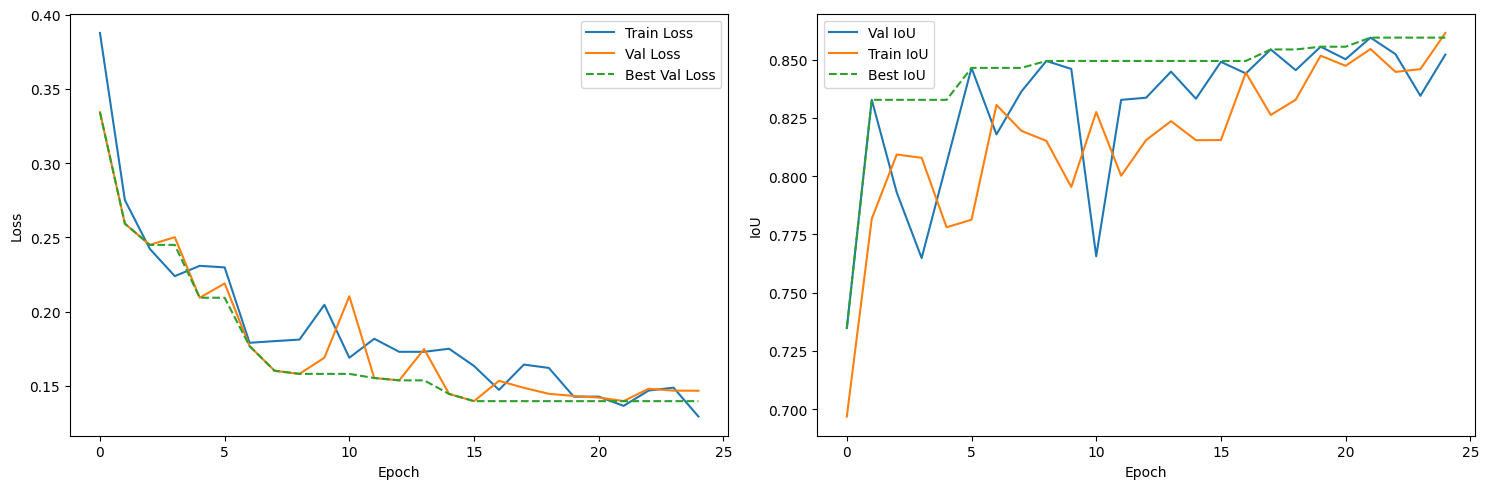

In [58]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR, Config.CLASS_WEIGHTS)
plot_training_curves()

25 False /content/skin_lesion_segmentation/logs [0.6, 0.4]


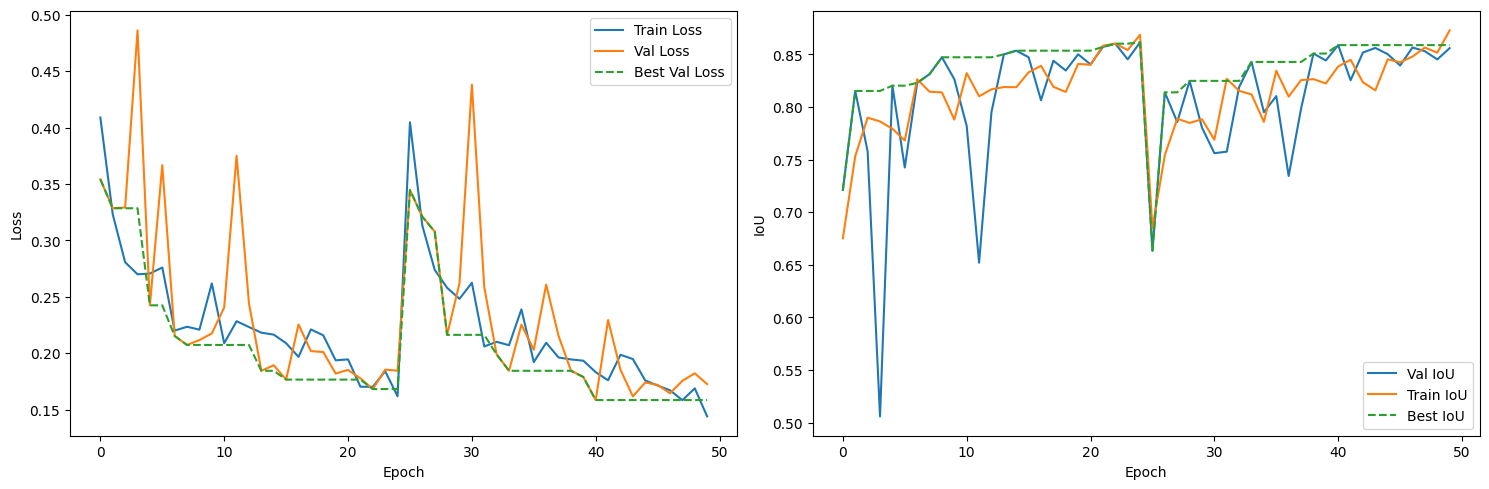

In [31]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR, Config.CLASS_WEIGHTS)
plot_training_curves()

25 False /content/skin_lesion_segmentation/logs [0.7, 0.3]


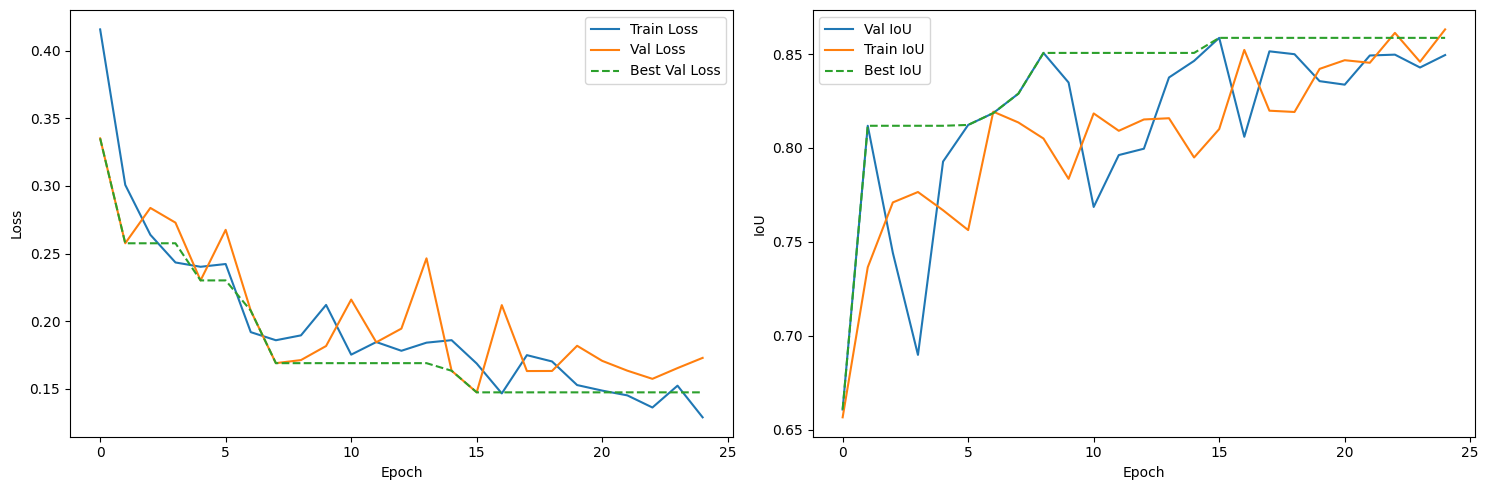

In [39]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR, Config.CLASS_WEIGHTS)
plot_training_curves()

25 False /content/skin_lesion_segmentation/logs [0.5, 0.5]


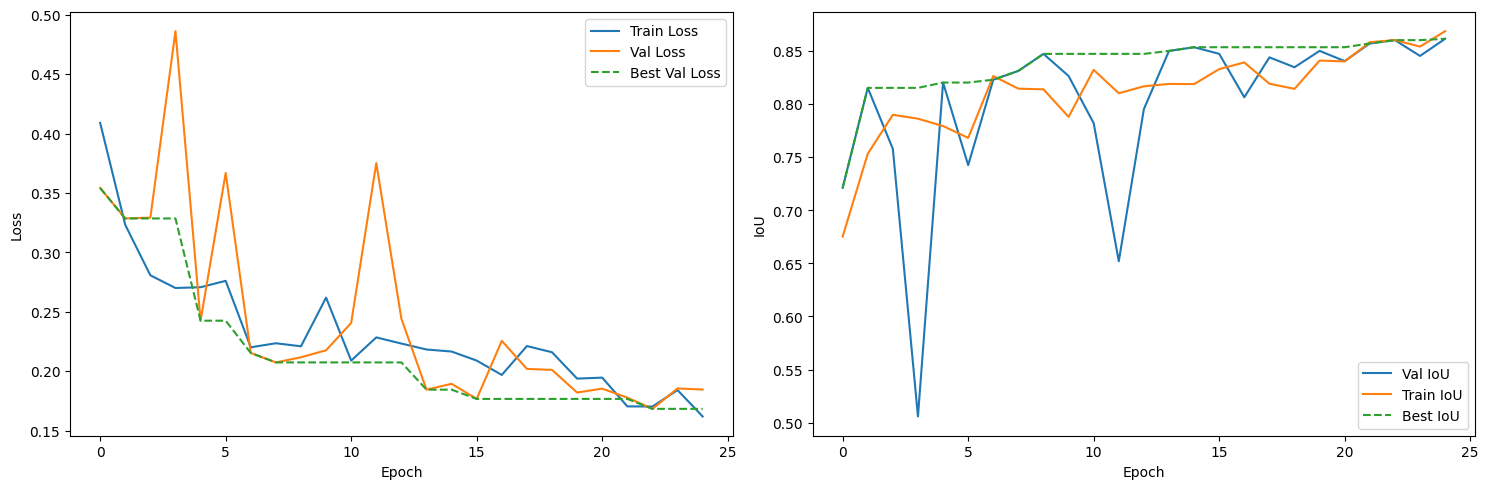

In [20]:
print(Config.EPOCHS, Config.PREPROCESS_FLAG, Config.LOGS_DIR, Config.CLASS_WEIGHTS)
plot_training_curves()

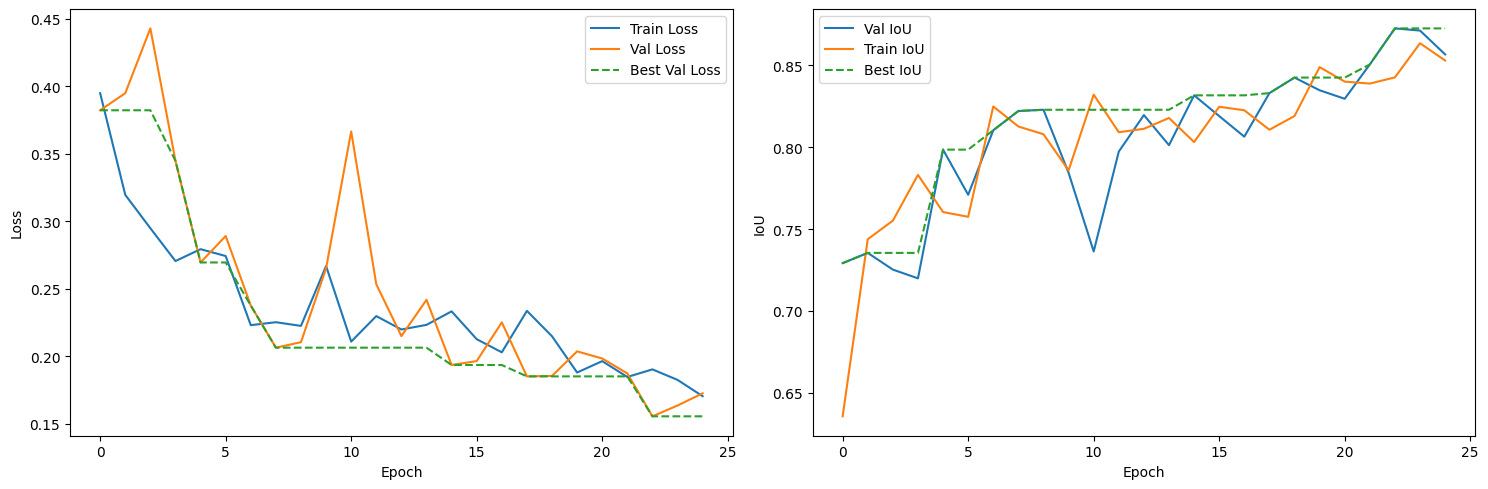

In [90]:
plot_training_curves() # PREPROCESS_FLAG = True

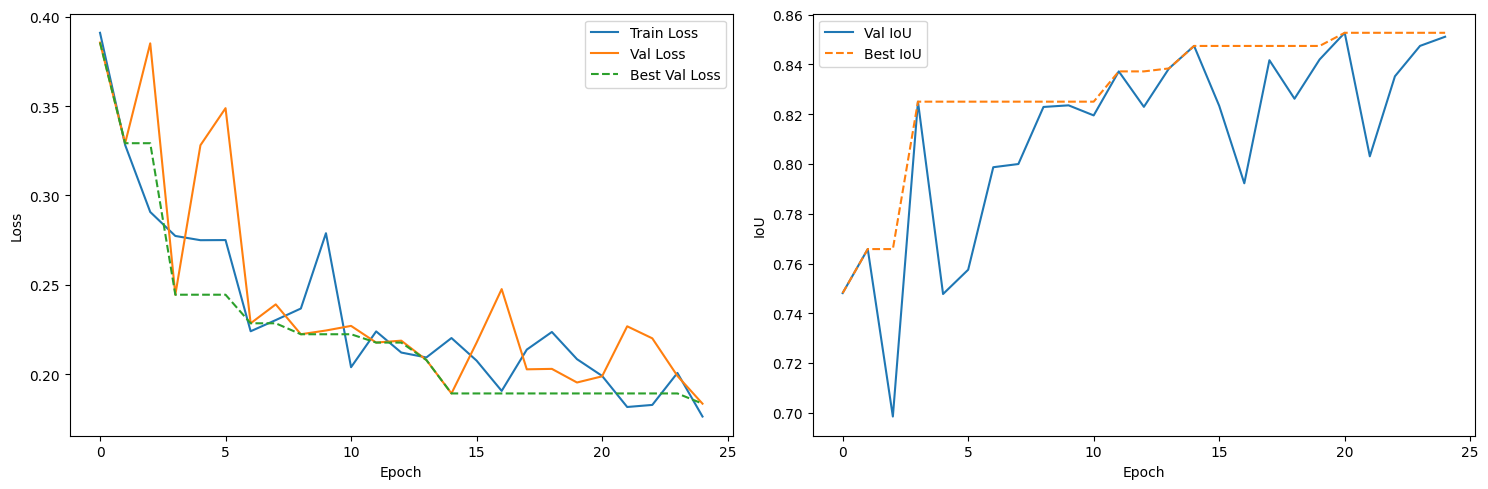

In [67]:
plot_training_curves()  # [0.3, 0.7]

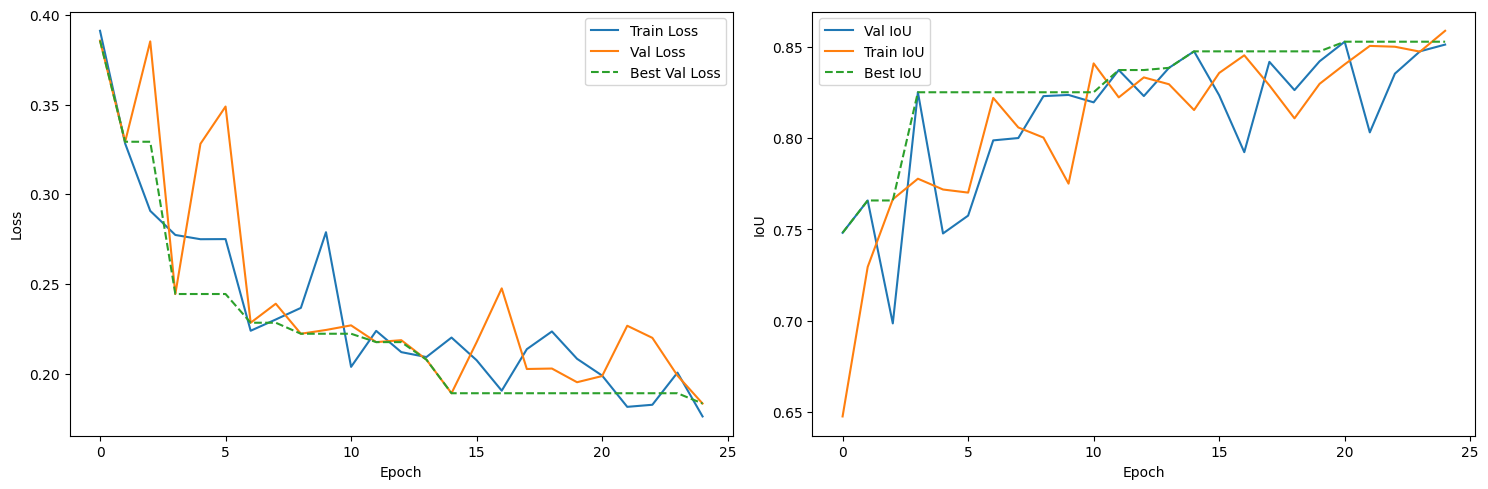

In [71]:
plot_training_curves()  # [0.3, 0.7]

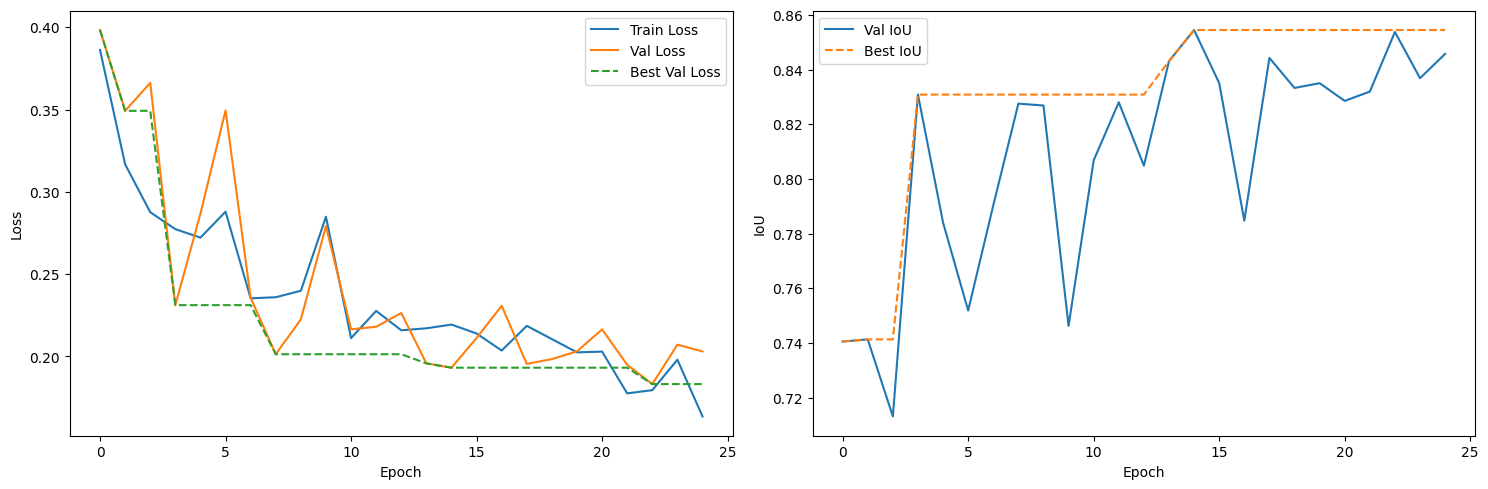

In [18]:
plot_training_curves()

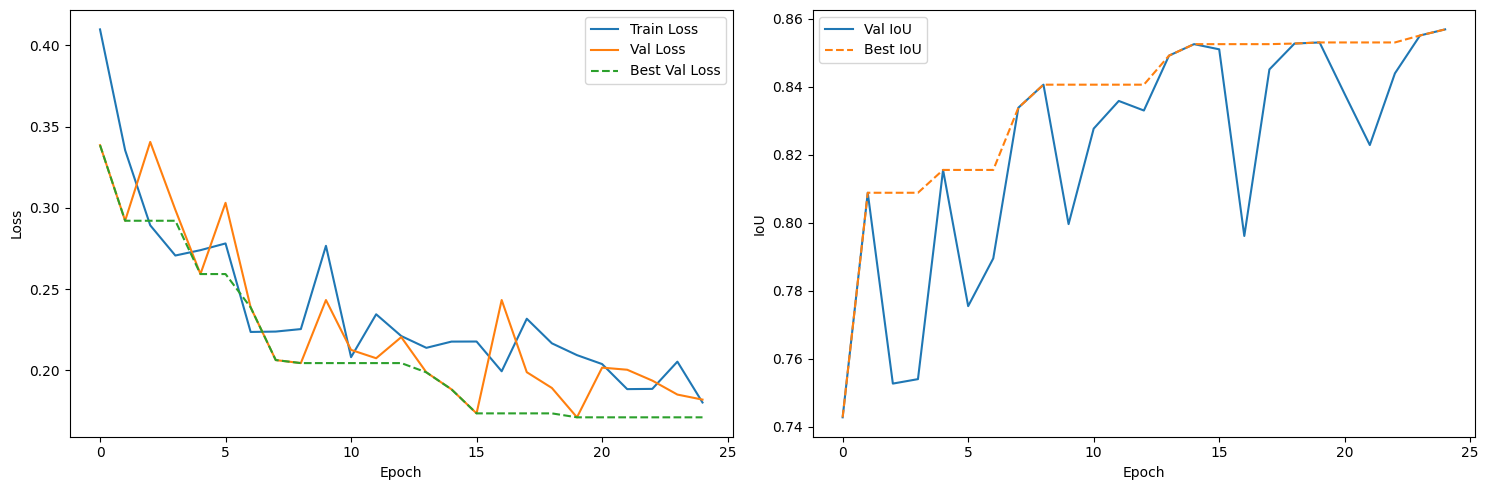

In [30]:
plot_training_curves()

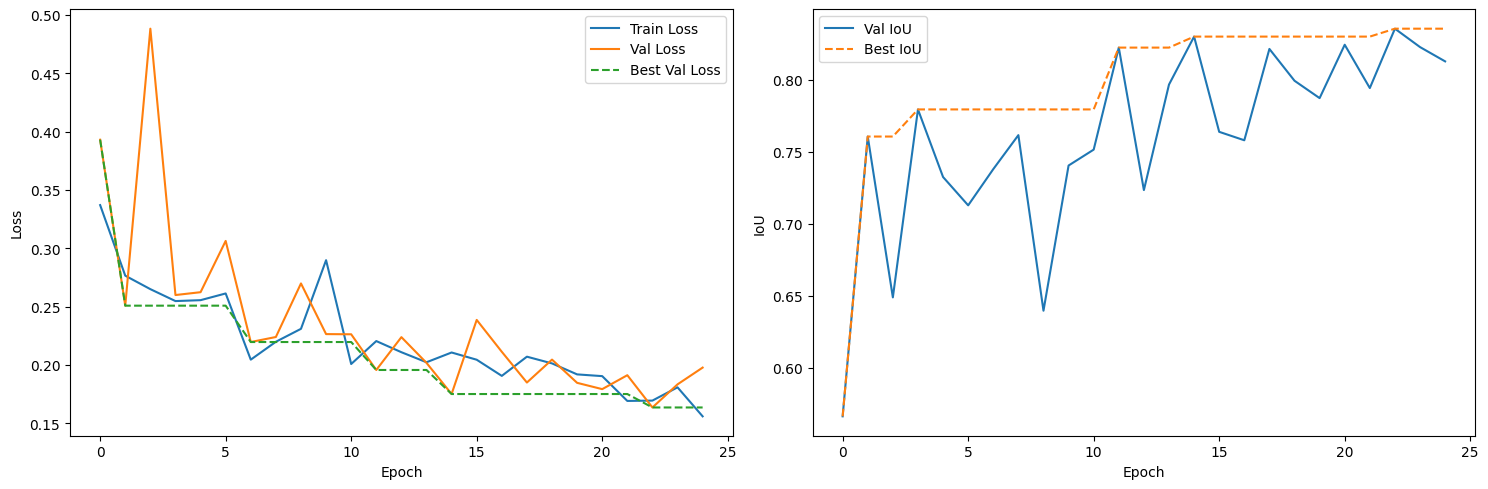

In [43]:
plot_training_curves()

Посмотрим на логи и **почистим** их:

In [72]:
!ls -la {Config.LOGS_DIR}

total 32
drwxr-xr-x  6 root root 4096 May 26 11:50 .
drwxr-xr-x 10 root root 4096 May 26 10:33 ..
-rw-r--r--  1 root root 8049 May 26 11:57 events.out.tfevents.1748260205.045455f91ff3.10446.17
drwxr-xr-x  2 root root 4096 May 26 11:50 IoU_train
drwxr-xr-x  2 root root 4096 May 26 11:50 IoU_val
drwxr-xr-x  2 root root 4096 May 26 11:50 Loss_train
drwxr-xr-x  2 root root 4096 May 26 11:50 Loss_val


Посмотреть, как показала себя модель, обученная на сырых данных, можно в отдельной тетрадочке

In [45]:
!rm -rf {Config.LOGS_DIR}/*

In [74]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 26 12:01 .
drwxr-xr-x 10 root root 4096 May 26 10:33 ..


##Сохранение:

In [ ]:
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True)
    torch.save(model.state_dict(), '/content/drive/MyDrive/final_model.pt')
    !cp -r "/content/skin_lesion_segmentation/logs" "/content/drive/MyDrive/"
except Exception as e:
    print(f"Ошибка сохранения: {e}")
    !zip -r logs.zip /content/skin_lesion_segmentation/logs
    files.download('logs.zip')  # Альтернативное сохранение

Mounted at /content/drive


##**Тестирование:**

In [21]:
from torch.utils.data import DataLoader
from tqdm import tqdm
from metric import MeanIoU
import numpy as np

In [104]:
print(Config.VAL_RATIO, Config.TEST_RATIO, Config.PREPROCESS_FLAG)

0.1 0.1 True


In [59]:
    _, _, test_dataset = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        preprocess=Config.PREPROCESS_FLAG,
        crop_borders=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        num_workers=Config.NUM_WORKERS,
        pin_memory=True
    )

    test_iou = evaluate(model, test_loader)
    print(f"\nTest IoU: {test_iou:.4f}")

It's okay
It's okay
It's okay
It's okay

Test IoU: 0.8259


In [60]:
def test_model(model, test_loader):
    model.eval()
    test_ious = []
    device = Config.DEVICE
    metric_fn = MeanIoU(classes_num=Config.NUM_CLASSES, ignore_index=-1).to(device)
    with torch.no_grad():
        for images, masks in tqdm(test_loader):
            outputs = model(images.to(device))
            iou = metric_fn(outputs, masks.to(device)).item()
            test_ious.append(iou)
    print(f"\nMean Test IoU: {np.mean(test_ious):.4f} ± {np.std(test_ious):.4f}")
    return test_ious

test_ious = test_model(model, test_loader)

100%|██████████| 5/5 [00:07<00:00,  1.59s/it]


Mean Test IoU: 0.8216 ± 0.0716


Расширенное тестирование:

In [24]:
from torchmetrics.classification import BinaryJaccardIndex as JaccardIndex
from torchmetrics.classification import BinaryF1Score as Dice
from torchmetrics import Precision, Recall
from collections import defaultdict

from prettytable import PrettyTable


def extended_evaluation(model, loader):
    device = next(model.parameters()).device

    metrics = {
        'iou': JaccardIndex().to(device),
        'dice': Dice().to(device),
        'precision': Precision(task='binary').to(device),
        'recall': Recall(task='binary').to(device)
    }

    results = defaultdict(list)

    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Evaluation"):
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            for name, metric in metrics.items():
                results[name].append(metric(preds, masks).item())

    return {name: np.mean(vals) for name, vals in results.items()}

def full_evaluation(model, datasets):
    model.eval()
    results = {}

    # Собираем метрики для всех датасетов
    for name, dataset in datasets.items():
        loader = DataLoader(
            dataset,
            batch_size=Config.BATCH_SIZE,
            num_workers=0,
            pin_memory=True
        )
        results[name] = extended_evaluation(model, loader)

    # Создаем и настраиваем таблицу
    table = PrettyTable()
    table.field_names = ["Метрика", "Train", "Val", "Test"]
    table.align["Метрика"] = "l"  # Выравнивание по левому краю
    table.align["Train"] = "r"     # Выравнивание по правому краю
    table.align["Val"] = "r"
    table.align["Test"] = "r"
    table.float_format = ".4"      # Формат чисел (4 знака после запятой)

    # Добавляем строки с метриками
    for metric in results['train'].keys():
        row = [metric.replace('_', ' ').title()]  # Преобразуем snake_case в нормальный вид
        for dataset in ['train', 'val', 'test']:
            row.append(results[dataset][metric])
        table.add_row(row)

    # Выводим таблицу с заголовком
    print("\n" + "="*50)
    print("РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ".center(50))
    print("="*50)
    print(table)
    print("="*50 + "\n")

    return results

Расширенная оценка:

In [43]:
    from dataset_upd_2005 import get_datasets
    train_ds, val_ds, test_ds = get_datasets(
        images_dir=Config.IMAGES_DIR,
        masks_dir=Config.MASKS_DIR,
        val_ratio=Config.VAL_RATIO,
        test_ratio=Config.TEST_RATIO,
        preprocess=Config.PREPROCESS_FLAG,
        #preprocess=True,
        crop_borders=True
    )

    # Вызываем полную оценку
    datasets = {
        'train': train_ds,
        'val': val_ds,
        'test': test_ds
    }



In [61]:
metrics = full_evaluation(model, datasets) # 0.7, 0.3 True

Evaluation: 100%|██████████| 5/5 [00:00<00:00,  6.19it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.7466 | 0.7147 | 0.7306 |
| Dice      | 0.8469 | 0.8297 | 0.8403 |
| Precision | 0.9348 | 0.8619 | 0.9280 |
| Recall    | 0.7937 | 0.8270 | 0.7732 |
+-----------+--------+--------+--------+



In [44]:
metrics = full_evaluation(model, datasets) # 0.7, 0.3

Evaluation: 100%|██████████| 5/5 [00:00<00:00,  6.03it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.8255 | 0.7841 | 0.7968 |
| Dice      | 0.9022 | 0.8697 | 0.8758 |
| Precision | 0.9385 | 0.8615 | 0.8912 |
| Recall    | 0.8774 | 0.9102 | 0.8647 |
+-----------+--------+--------+--------+



In [36]:
metrics = full_evaluation(model, datasets)

Evaluation: 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.8302 | 0.7937 | 0.8121 |
| Dice      | 0.9049 | 0.8744 | 0.8899 |
| Precision | 0.9206 | 0.8568 | 0.9102 |
| Recall    | 0.8999 | 0.9275 | 0.8729 |
+-----------+--------+--------+--------+



In [49]:
metrics = full_evaluation(model, datasets)

Evaluation: 100%|██████████| 5/5 [00:00<00:00,  6.20it/s]


             РЕЗУЛЬТАТЫ ОЦЕНКИ МОДЕЛИ             
+-----------+--------+--------+--------+
| Метрика   |  Train |    Val |   Test |
+-----------+--------+--------+--------+
| Iou       | 0.8230 | 0.7841 | 0.7968 |
| Dice      | 0.9006 | 0.8697 | 0.8758 |
| Precision | 0.9383 | 0.8615 | 0.8912 |
| Recall    | 0.8757 | 0.9102 | 0.8647 |
+-----------+--------+--------+--------+



Визуализация предсказаний:

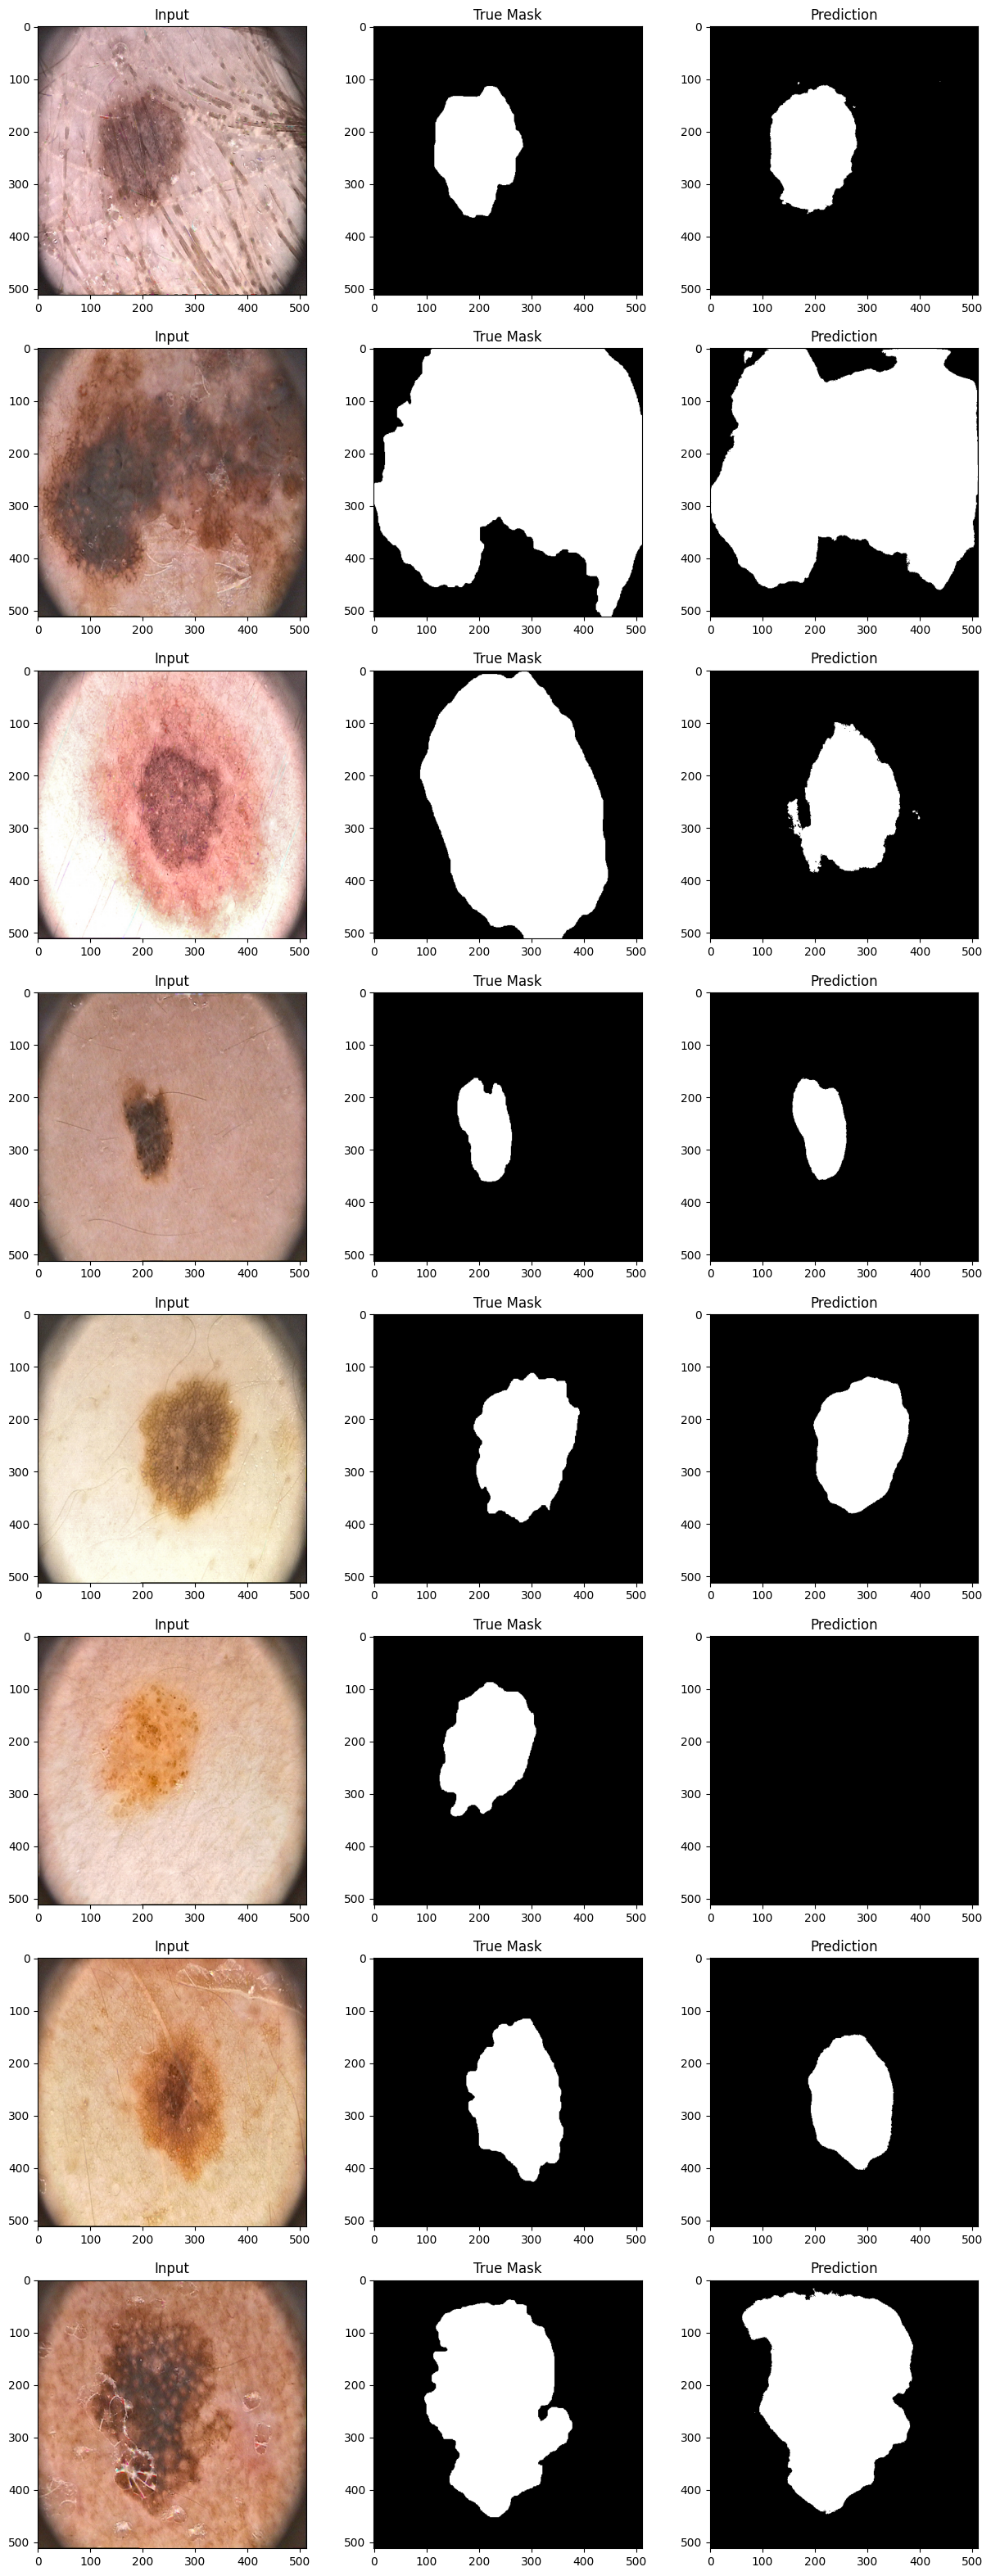

In [63]:
def show_predictions(model, dataset, n=3):
    model.eval()
    fig, axes = plt.subplots(n, 3, figsize=(15, n*5))
    device = Config.DEVICE
    for i in range(n):
        img, true_mask = dataset[i]
        with torch.no_grad():
            pred = model(img.unsqueeze(0).to(device)).argmax(1).squeeze().cpu()
        axes[i, 0].imshow(img.permute(1, 2, 0))
        axes[i, 1].imshow(true_mask.squeeze(), cmap='gray')
        axes[i, 2].imshow(pred, cmap='gray')

        axes[i, 0].set_title("Input")
        axes[i, 1].set_title("True Mask")
        axes[i, 2].set_title("Prediction")
    plt.show()


show_predictions(model, test_dataset, 8)

**Очистка** перед повторным запуском:

In [ ]:
!rm -rf {Config.LOGS_DIR}/*

In [ ]:
!ls -la {Config.LOGS_DIR}

total 8
drwxr-xr-x  2 root root 4096 May 23 12:14 .
drwxr-xr-x 10 root root 4096 May 23 11:45 ..


Посмотреть на эпоху с meanIoU == 0.49

Хорошо бы посмотреть, какие вообще результаты даёт базовая юнет и подумать про модификации (поискать статьи)

In [ ]:
print("Congrats!")

In [ ]:
exit()